In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from mpl_toolkits.mplot3d.axes3d import Axes3D

**Задание 1.
Постройте график зависимости весов всех признаков от lambda в самописной L2-регуляризации (на данных про ЕГЭ). Сделайте вывод.**

In [2]:
X = np.array([[   1,    1,  500,    1],
              [   1,    1,  700,    1],
              [   1,    2,  750,    2],
              [   1,    5,  600,    1],
              [   1,    3, 1450,    2],
              [   1,    0,  800,    1],
              [   1,    5, 1500,    3],
              [   1,   10, 2000,    3],
              [   1,    1,  450,    1],
              [   1,    2, 1000,    2]])
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

In [3]:
def standart_scale(X):
    mean = X.mean()
    std = X.std()
    return (X - mean) / std

In [4]:
X_st = X.copy().astype(np.float64)
X_st[:, 1] = standart_scale(X_st[:, 1])
X_st[:, 2] = standart_scale(X_st[:, 2])
X_st

array([[ 1.        , -0.70710678, -0.97958969,  1.        ],
       [ 1.        , -0.70710678, -0.56713087,  1.        ],
       [ 1.        , -0.35355339, -0.46401617,  2.        ],
       [ 1.        ,  0.70710678, -0.77336028,  1.        ],
       [ 1.        ,  0.        ,  0.97958969,  2.        ],
       [ 1.        , -1.06066017, -0.36090146,  1.        ],
       [ 1.        ,  0.70710678,  1.08270439,  3.        ],
       [ 1.        ,  2.47487373,  2.11385144,  3.        ],
       [ 1.        , -0.70710678, -1.08270439,  1.        ],
       [ 1.        , -0.35355339,  0.05155735,  2.        ]])

In [5]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [6]:
def gradient_descent_reg_l2(X, y, iterations, eta=1e-4, reg=1e-8):
    print(f'lambda={reg}')
    W = np.random.randn(X_st.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X_st.T @ (y_pred - y) # градиент функции ошибки
        dReg = reg * W # градиент регуляризации
        
        W -= eta * dQ + dReg
    
    print(f'Weights: {W}')
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

In [7]:
W = gradient_descent_reg_l2(X_st, y, iterations=5000, eta=0.01, reg=1e-4)

lambda=0.0001
Weights: [37.50773901  6.08806358 -2.02043605 11.04558026]
Final MSE: 25.81531495659785


In [8]:
y1 = []
y2 = []
y3 = []
y4 = []
a_reg = np.linspace(1e-4, 1, 100)
for coef in a_reg:
    weights = gradient_descent_reg_l2(X_st, y, iterations=1000, eta=0.01, reg=coef)
    y1.append(weights[0])
    y2.append(weights[1])
    y3.append(weights[2])
    y4.append(weights[3])

lambda=0.0001
Weights: [27.44792084  5.92708115 -5.9915246  16.79422315]
Final MSE: 33.91092187160329
lambda=0.010199999999999999
Weights: [14.68255165  1.1209401  -2.97587705 20.19372828]
Final MSE: 108.59999202619676
lambda=0.0203
Weights: [12.29213047  0.71165209 -1.54296974 18.66550417]
Final MSE: 205.96410102530518
lambda=0.0304
Weights: [10.82591278  0.67403572 -0.81383032 17.18747046]
Final MSE: 317.1097845759047
lambda=0.0405
Weights: [ 9.74620831  0.69246791 -0.38484674 15.89277638]
Final MSE: 432.4969081093116
lambda=0.0506
Weights: [ 8.8931395   0.71308685 -0.11278002 14.76895152]
Final MSE: 546.9105539264874
lambda=0.060700000000000004
Weights: [ 8.19277573  0.72608325  0.06776253 13.78949995]
Final MSE: 657.6341865345455
lambda=0.0708
Weights: [ 7.60326956  0.73110489  0.19111335 12.93009188]
Final MSE: 763.3307942943303
lambda=0.0809
Weights: [ 7.09809109  0.72973601  0.27696871 12.17066497]
Final MSE: 863.4335793709473
lambda=0.091
Weights: [ 6.65917071  0.72367011  0.33

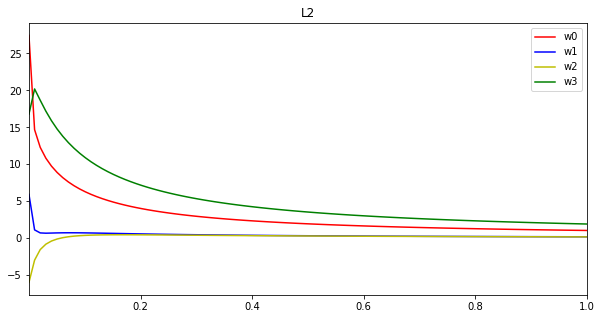

In [9]:
fig, axes = plt.subplots(figsize=(10,5))
plt.xlim(1e-4,1)
plt.plot(a_reg, y1, color='r', label = 'w0')
plt.plot(a_reg, y2, color='b', label = 'w1')
plt.plot(a_reg, y3, color='y', label = 'w2')
plt.plot(a_reg, y4, color='g', label = 'w3')
plt.legend()
plt.title('L2')
plt.show()

Вывод: Чем выше коэффициент регуляризации, тем ниже сложность модели, 
соответственно, при увеличении lambda, веса стремятся к нулю.

**Задание 2.
Используя файл Lesson_2_extended.ipynb (он в web2.zip в материалах).
Напишите функцию наподобие gradient_descent_reg_l2, но для применения L1-регуляризации.**

In [10]:
def gradient_descent_reg_l1(X, y, iterations, eta=1e-4, reg=1e-8):
    print(f'lambda={reg}')
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = reg * np.sign(W) # градиент регуляризации
        
        W -= eta * dQ + dReg
    
    print(f'Weights: {W}')
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

In [11]:
W = gradient_descent_reg_l1(X_st, y, iterations=1000, eta=0.01, reg=1e-4)

lambda=0.0001
Weights: [27.52622742  6.06561664 -6.14288697 16.79501518]
Final MSE: 33.86290826479539


In [12]:
y1 = []
y2 = []
y3 = []
y4 = []
a_reg = np.linspace(1e-4, 2, 100)
for coef in a_reg:
    weights = gradient_descent_reg_l1(X_st, y, iterations=1000, eta=1e-2, reg=coef)
    y1.append(weights[0])
    y2.append(weights[1])
    y3.append(weights[2])
    y4.append(weights[3])

lambda=0.0001
Weights: [28.186913    6.07912315 -5.88505143 16.41756476]
Final MSE: 33.07475235575129
lambda=0.0203010101010101
Weights: [25.38422086  1.4286374  -1.97883563 17.46673104]
Final MSE: 45.338993410281425
lambda=0.040502020202020206
Weights: [ 2.43949159e+01 -3.40727326e-03 -1.13906626e-02  1.74852078e+01]
Final MSE: 56.8791832759861
lambda=0.06070303030303031
Weights: [22.95677369  0.07462046 -0.04324116 17.86559734]
Final MSE: 62.809533222794
lambda=0.08090404040404041
Weights: [20.17481873 -0.02590731 -0.06954599 18.92875082]
Final MSE: 75.73940063651558
lambda=0.10110505050505052
Weights: [ 1.74870404e+01  1.26989549e-02 -8.76483114e-02  1.99443196e+01]
Final MSE: 91.33754120110002
lambda=0.12130606060606061
Weights: [14.7321109   0.05237204 -0.03195055 20.99200614]
Final MSE: 111.12367840076706
lambda=0.1415070707070707
Weights: [11.81744692 -0.13363336 -0.09258595 22.1201361 ]
Final MSE: 133.66146748864668
lambda=0.1617080808080808
Weights: [ 8.94471089  0.10098572 -0

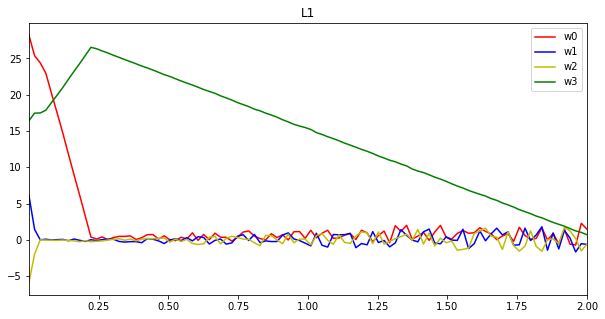

In [13]:
fig, axes = plt.subplots(figsize=(10,5))
plt.xlim(1e-4,2)
plt.plot(a_reg, y1, color='r', label = 'w0')
plt.plot(a_reg, y2, color='b', label = 'w1')
plt.plot(a_reg, y3, color='y', label = 'w2')
plt.plot(a_reg, y4, color='g', label = 'w3')
plt.legend()
plt.title('L1')
plt.show()